# **MIE 1624 Introduction to Data Science and Analytics – Winter 2023**


# **Assignment 1**


Anbumanivel Mohan Suganthi - 100696653 <br>
February 12, 2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import levene
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Data
data = pd.read_csv('clean_kaggle_data.csv')
data.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.describe()

,Unnamed: 0,Time from Start to Finish (seconds),Q25,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER
count,15391.000000,1.539100e+04,15391.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,12955.828926,9.260347e+03,49116.009356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7493.072541,8.849740e+04,98090.207788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.210000e+02,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6511.000000,5.450000e+02,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,12916.000000,7.500000e+02,15000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,19440.500000,1.140000e+03,60000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,25973.000000,2.488653e+06,1000000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Q1. Exploratory Data Analysis**

**i). Education vs Salary**

In [4]:
# Education and Salary data summary
education_salary = data[['Q4', 'Q25']]
education_salary = education_salary.rename(columns = {'Q4':'Education', 'Q25':'Salary'})
education_salary.groupby('Education').describe()

Salary                \
                                                     count          mean   
Education                                                                  
Bachelor’s degree                                   4777.0  35578.291815   
Doctoral degree                                     2217.0  70641.181777   
I prefer not to answer                               334.0  34191.616766   
Master’s degree                                     6799.0  52706.868657   
No formal education past high school                 228.0  38208.333333   
Professional doctorate                               290.0  67465.517241   
Some college/university study without earning a...   746.0  41990.616622   

                                                                           \
                                                              std     min   
Education                                                                   
Bachelor’s degree                                    89382.060777  1000.0   
Doctoral degree                                     117160.947589  1000.0   
I prefer not to answer                              113660.692249  1000.0   
Master’s degree                                      90928.786678  1000.0   
No formal education past high school                100811.090707  1000.0   
Professional doctorate                              136718.387541  1000.0   
Some college/university study without earning a...  110270.037272  1000.0   

                                                                              \
                                                       25%      50%      75%   
Education                                                                      
Bachelor’s degree                                   1000.0   7500.0  40000.0   
Doctoral degree                                     4000.0  40000.0  90000.0   
I prefer not to answer                              1000.0   4000.0  25000.0   
Master’s degree                                     3000.0  25000.0  70000.0   
No formal education past high school                1000.0   7500.0  50000.0   
Professional doctorate                              2000.0  20000.0  80000.0   
Some college/university study without earning a...  1000.0  10000.0  50000.0   

                                                               
                                                          max  
Education                                                      
Bachelor’s degree                                   1000000.0  
Doctoral degree                                     1000000.0  
I prefer not to answer                              1000000.0  
Master’s degree                                     1000000.0  
No formal education past high school                1000000.0  
Professional doctorate                              1000000.0  
Some college/university study without earning a...  1000000.0

In [5]:
edu_sal = education_salary.groupby('Education').mean()  # Taking mean salary
edu_sal = edu_sal.reset_index()
edu_sal

,Education,Salary
0,Bachelor’s degree,35578.291815
1,Doctoral degree,70641.181777
2,I prefer not to answer,34191.616766
3,Master’s degree,52706.868657
4,No formal education past high school,38208.333333
5,Professional doctorate,67465.517241
6,Some college/university study without earning ...,41990.616622


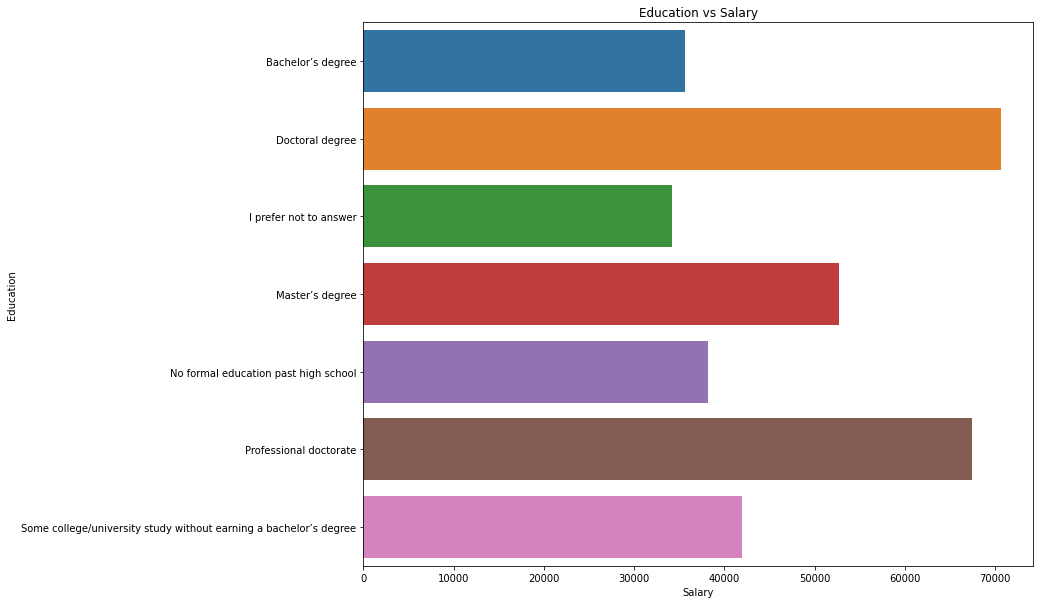

In [6]:
# Plot of Education vs Salary
plt.figure(figsize=(12,10))
sns.barplot(x=edu_sal.Salary, y=edu_sal.Education)
plt.title('Education vs Salary')
plt.show()

**ii). Programming Experience vs Salary**

In [7]:
# Programming Experience and Salary data summary
experience_salary = data[['Q6', 'Q25']]
experience_salary = experience_salary.rename(columns = {'Q6':'Experience', 'Q25':'Salary'})
experience_salary.groupby('Experience').describe()

Salary                                        \
                            count           mean            std     min   
Experience                                                                
1-3 years                  3691.0   27763.885126   71454.037904  1000.0   
10-20 years                1846.0   83355.904659  119174.584809  1000.0   
20+ years                  1624.0  105358.682266  144497.878806  1000.0   
3-5 years                  2461.0   40831.369362   88867.577602  1000.0   
5-10 years                 2345.0   62156.716418   98771.984542  1000.0   
< 1 years                  2463.0   22604.141291   64817.238338  1000.0   
I have never written code   961.0   27651.404787   70575.009746  1000.0   

                                                                  
                               25%      50%       75%        max  
Experience                                                        
1-3 years                   1000.0   5000.0   30000.0  1000000.0  
10-20 years                15000.0  55000.0  100000.0  1000000.0  
20+ years                  20000.0  70000.0  125000.0  1000000.0  
3-5 years                   2000.0  15000.0   50000.0  1000000.0  
5-10 years                  7500.0  30000.0   80000.0  1000000.0  
< 1 years                   1000.0   4000.0   20000.0  1000000.0  
I have never written code   1000.0   5000.0   30000.0  1000000.0

In [8]:
exp_sal = experience_salary.groupby('Experience').mean() # Taking mean salary
exp_sal = exp_sal.reset_index()
exp_sal.insert(2,"Order", [2, 5, 6, 3, 4, 1, 7])
exp_sal = exp_sal.sort_values(by=['Order'])
exp_sal

,Experience,Salary,Order
5,< 1 years,22604.141291,1
0,1-3 years,27763.885126,2
3,3-5 years,40831.369362,3
4,5-10 years,62156.716418,4
1,10-20 years,83355.904659,5
2,20+ years,105358.682266,6
6,I have never written code,27651.404787,7


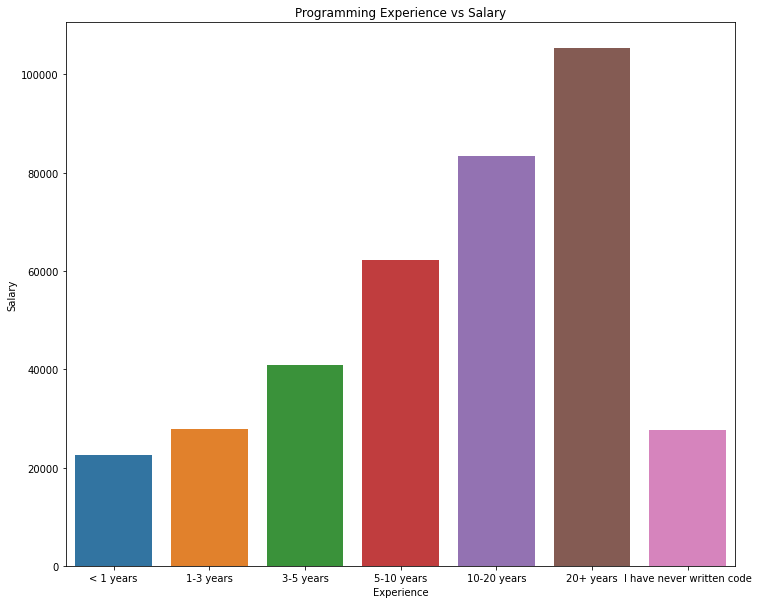

In [9]:
# Plot of Programming Experience vs Salary
plt.figure(figsize=(12,10))
sns.barplot(x=exp_sal.Experience, y=exp_sal.Salary)
plt.title('Programming Experience vs Salary')
plt.show()

**iii). Current Position vs Salary**

In [10]:
# Current Position and Salary data summary
position_salary = data[['Q5', 'Q25']]
position_salary = position_salary.rename(columns = {'Q5':'Current Position', 'Q25':'Salary'})
position_salary.groupby('Current Position').describe()

Salary                                       \
                               count          mean            std     min   
Current Position                                                            
Business Analyst               885.0  39983.050847   79124.960207  1000.0   
DBA/Database Engineer          151.0  46023.178808   59467.227326  1000.0   
Data Analyst                  2039.0  28827.856793   56755.093315  1000.0   
Data Engineer                  597.0  49226.968174   87071.250580  1000.0   
Data Scientist                3240.0  57771.296296  106170.740600  1000.0   
Developer Relations/Advocacy    86.0  72656.976744  171850.127276  1000.0   
Machine Learning Engineer     1327.0  42787.490580  101921.189100  1000.0   
Other                         2204.0  56941.923775  115403.732022  1000.0   
Product Manager                285.0  90877.192982  143369.772112  1000.0   
Program/Project Manager        784.0  65728.954082  102745.212731  1000.0   
Research Scientist            1404.0  47183.048433   80804.503293  1000.0   
Software Engineer             2110.0  45505.450237  101319.783478  1000.0   
Statistician                   279.0  35992.831541   78035.974126  1000.0   

                                                                     
                                  25%      50%       75%        max  
Current Position                                                     
Business Analyst               3000.0  15000.0   50000.0  1000000.0  
DBA/Database Engineer          4000.0  20000.0   60000.0   250000.0  
Data Analyst                   1000.0   7500.0   40000.0  1000000.0  
Data Engineer                  2000.0  20000.0   60000.0  1000000.0  
Data Scientist                 2000.0  20000.0   80000.0  1000000.0  
Developer Relations/Advocacy   1000.0  15000.0   60000.0  1000000.0  
Machine Learning Engineer      1000.0   5000.0   50000.0  1000000.0  
Other                          3000.0  20000.0   70000.0  1000000.0  
Product Manager               10000.0  50000.0  125000.0  1000000.0  
Program/Project Manager        7500.0  40000.0   90000.0  1000000.0  
Research Scientist             3000.0  20000.0   60000.0  1000000.0  
Software Engineer              2000.0  15000.0   60000.0  1000000.0  
Statistician                   1000.0   5000.0   40000.0  1000000.0

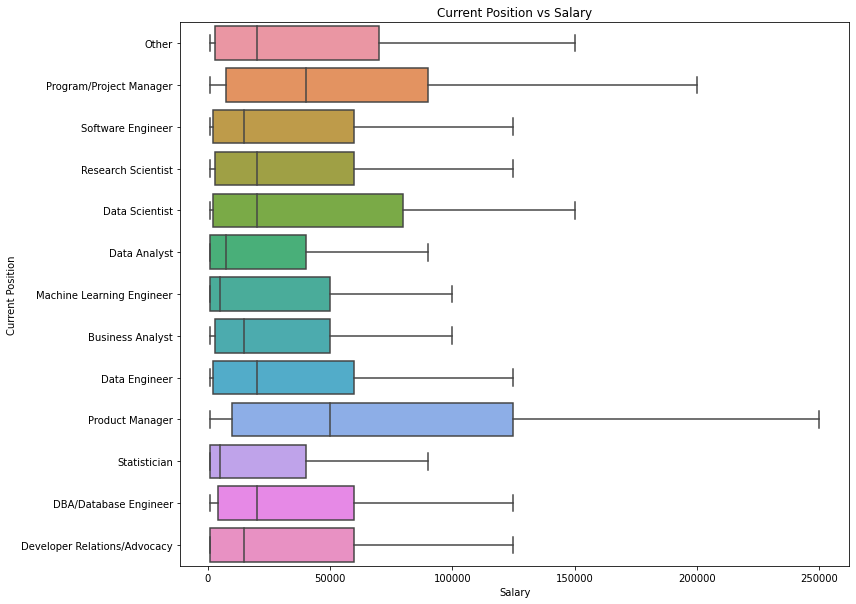

In [11]:
# Plot of Current Position vs Salary
plt.figure(figsize=(12,10))
sns.boxplot(data=position_salary, x='Salary', y='Current Position', showfliers=False)
plt.title('Current Position vs Salary')
plt.show()

# **Q2. Estimating the difference between average salary (Q25) of men vs. women (Q2)**

**a). Descriptive statistics for each group**

In [12]:
#Dataframe of men
male = data.loc[data.Q2=='Man']
df_male = male[['Q2', 'Q25']]
df_male = df_male.rename(columns = {'Q2':'Sex', 'Q25':'Salary'})
print("Missing Values:", df_male['Salary'].isnull().sum())
print("\nDescriptive statistics for men")
df_male.describe()

Missing Values: 0

Descriptive statistics for men


,Salary
count,12642.000000
mean,51193.600696
std,99979.274378
min,1000.000000
25%,2000.000000
50%,20000.000000
75%,60000.000000
max,1000000.000000


In [13]:
#Dataframe of women
female = data.loc[data.Q2=='Woman']
df_female = female[['Q2', 'Q25']]
df_female = df_female.rename(columns = {'Q2':'Sex', 'Q25':'Salary'})
print("Missing Values:", df_female['Salary'].isnull().sum())
print("\nDescriptive statistics for women")
df_female.describe()

Missing Values: 0

Descriptive statistics for women


,Salary
count,2482.000000
mean,34816.881547
std,72017.347888
min,1000.000000
25%,1000.000000
50%,7500.000000
75%,50000.000000
max,1000000.000000


**b). If suitable, perform a two-sample t-test with a 0.05 threshold**

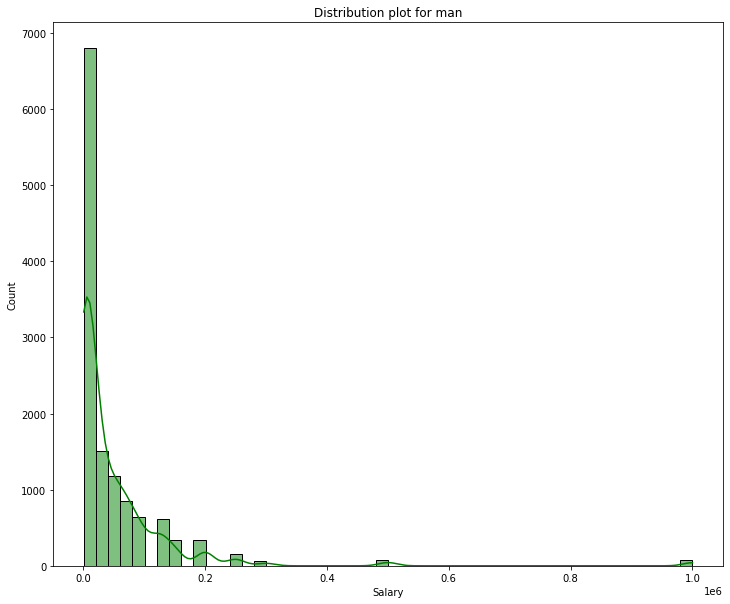

In [14]:
# Distribution plot for male salary
plt.figure(figsize = (12,10))
sns.histplot(df_male['Salary'], kde=True, color="green", bins=50)
plt.title("Distribution plot for man")
plt.show()

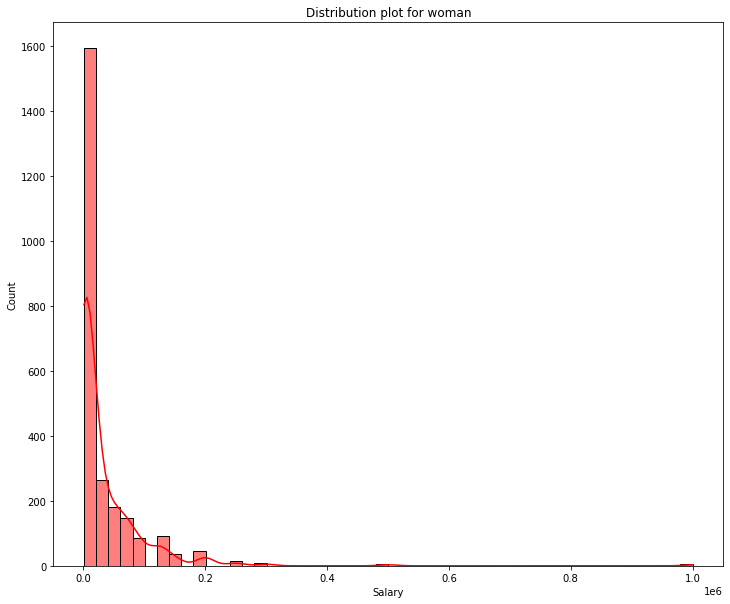

In [15]:
# Distribution plot for female salary
plt.figure(figsize = (12,10))
sns.histplot(df_female['Salary'], kde=True, color="red", bins=50)
plt.title("Distribution plot for woman")
plt.show()

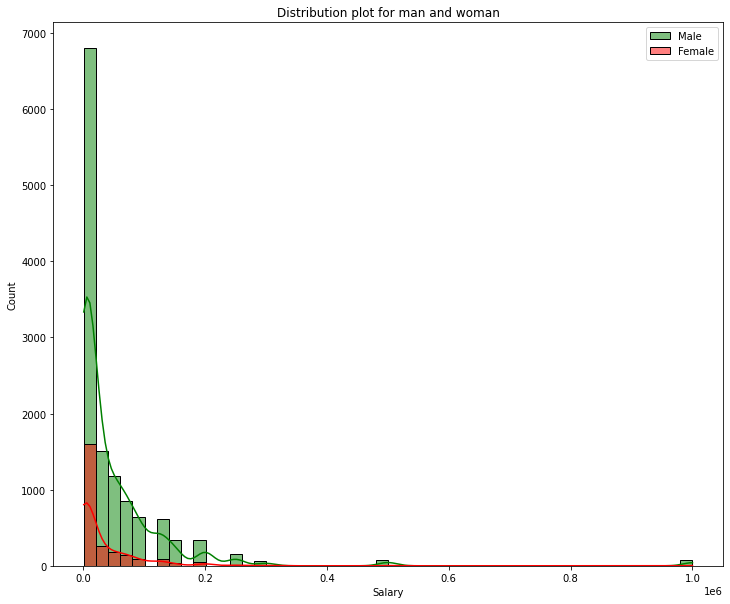

In [16]:
# Plotting male and female distribution in single plot
plt.figure(figsize = (12,10))
sns.histplot(df_male['Salary'], kde=True, color="green", bins=50, label='Male')
sns.histplot(df_female['Salary'], kde=True, color="red", bins=50, label='Female')
plt.legend()
plt.title("Distribution plot for man and woman")
plt.show()

In [17]:
# Shapiro-Wilk test to determine normality
threshold = 0.05

def hypothesis(x,threshold):
  if x>threshold:
    print("We fail to reject the null hypothesis as the data is normally distributed\n")
  else:
    print("We reject the null hypothesis as the data is not normally distributed\n")

shapiro_test_male = stats.shapiro(df_male['Salary']) 
shapiro_test_female = stats.shapiro(df_female['Salary'])

print("Male")
print("Statistic:", shapiro_test_male.statistic)
print("p-value:", shapiro_test_male.pvalue)
hypothesis(shapiro_test_male.pvalue,threshold)
print("Female")
print("Statistic:", shapiro_test_female.statistic)
print("p-value:", shapiro_test_female.pvalue)
hypothesis(shapiro_test_female.pvalue,threshold)

Male
Statistic: 0.4714203476905823
p-value: 0.0
We reject the null hypothesis as the data is not normally distributed

Female
Statistic: 0.4621996283531189
p-value: 0.0
We reject the null hypothesis as the data is not normally distributed



In [18]:
# Levene test to determine homogeneity of variance
levene_stat, levene_p = levene(df_male['Salary'], df_female['Salary'], center='mean')
print("Statistic:", levene_stat)
print("p-value:", levene_p)
if levene_p>threshold:
  print("We fail to reject the homogeneity of variance")
else:
  print("We reject the homogeneity of variance")

Statistic: 57.44871144286794
p-value: 3.670017040680053e-14
We reject the homogeneity of variance


Based on the histogram and Shapiro-Wilk test we can see that the data is not normally distributed. And, based on levene test we can see that the variance is not equal for both the man and woman salary.

**c). Bootstrap the data, Plot two bootstrapped distributions (for men and women) and the distribution of the difference in means.**

In [19]:
# Bootstrapping the data
def bootstrap(inp):
  sample=[]
  for i in range(1000):
    x = np.random.choice(inp, size=len(inp), replace=True)
    sample.append(x.mean())
  return sample

Mean of the bootstrapped data for male: 51248.14637715551


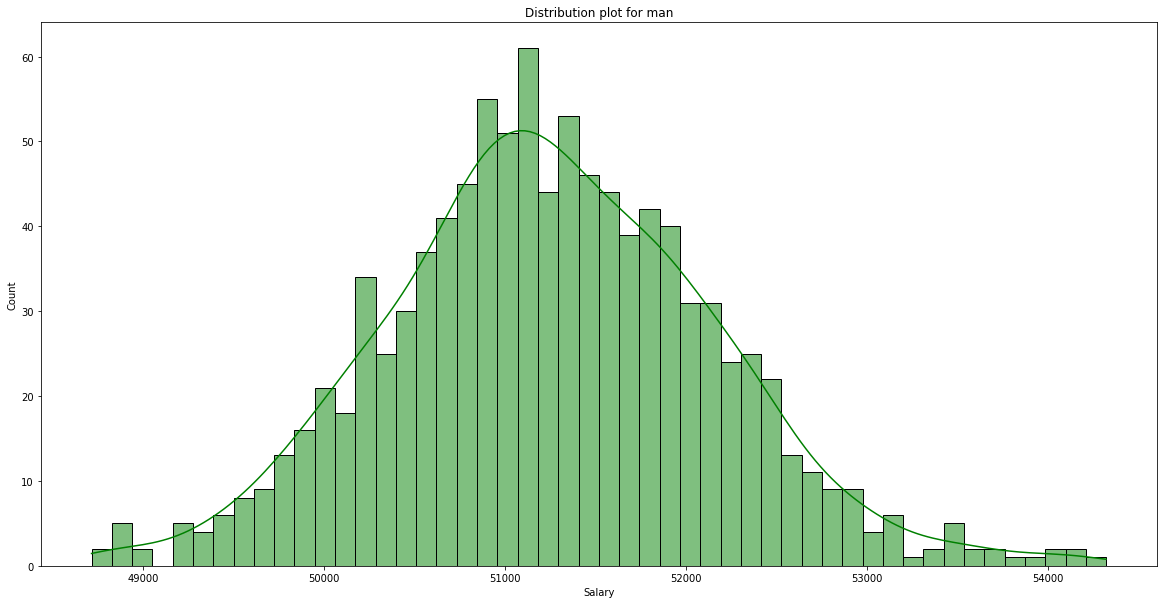

In [20]:
# Bootstrapped distribution for man
bootstrap_male = bootstrap(df_male['Salary'])
print("Mean of the bootstrapped data for male:", np.mean(bootstrap_male))
plt.figure(figsize = (20,10))
sns.histplot(bootstrap_male, kde=True, color="green", bins=50)
plt.xlabel('Salary')
plt.title("Distribution plot for man")
plt.show()

Mean of the bootstrapped data for female: 34858.06829170024


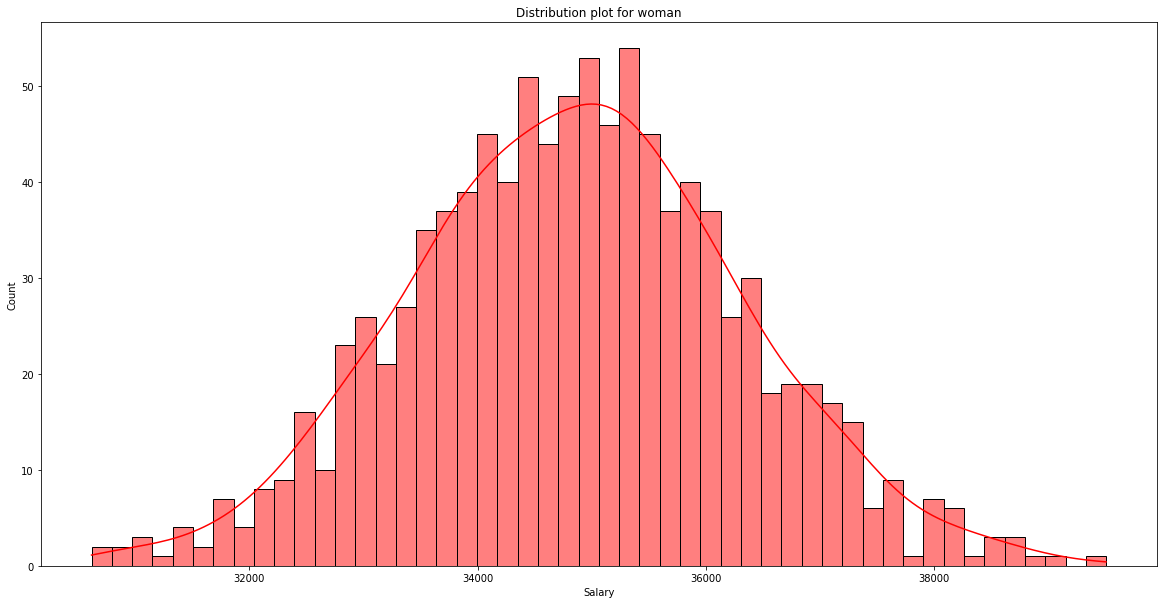

In [21]:
# Bootstrapped distribution for woman
bootstrap_female = bootstrap(df_female['Salary'])
print("Mean of the bootstrapped data for female:", np.mean(bootstrap_female))
plt.figure(figsize = (20,10))
sns.histplot(bootstrap_female, kde=True, color="red", bins=50)
plt.xlabel('Salary')
plt.title("Distribution plot for woman")
plt.show()

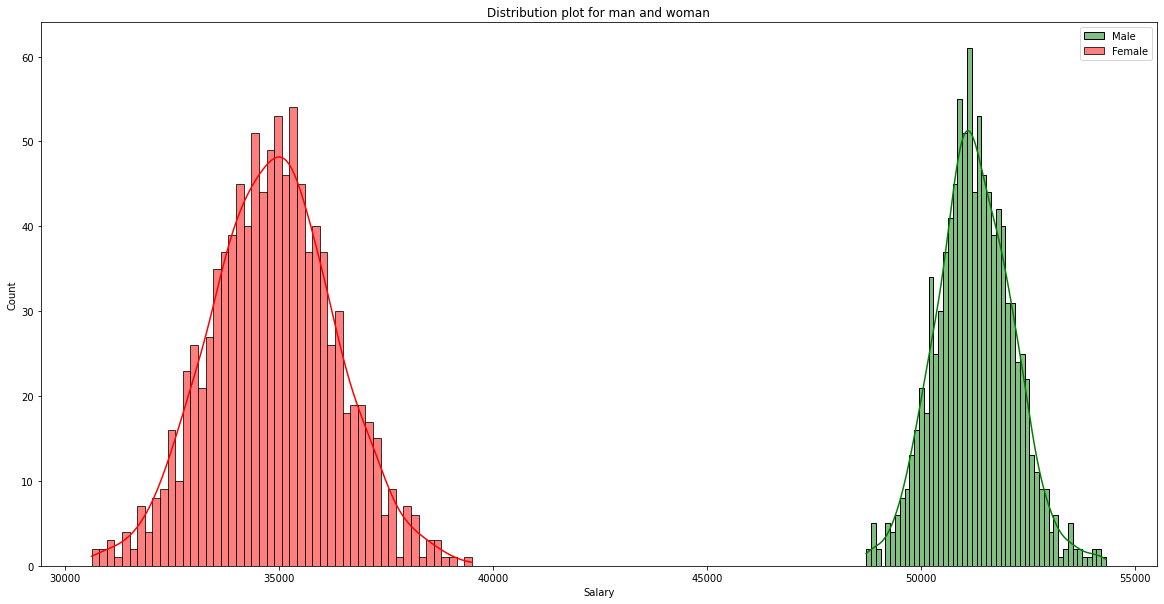

In [22]:
# Bootstrapped distribution for man and woman
plt.figure(figsize = (20,10))
sns.histplot(bootstrap_male, kde=True, color="green", bins=50, label='Male')
sns.histplot(bootstrap_female, kde=True, color="red", bins=50, label='Female')
plt.legend()
plt.xlabel('Salary')
plt.title("Distribution plot for man and woman")
plt.show()

Mean of the difference: 16390.078085455272


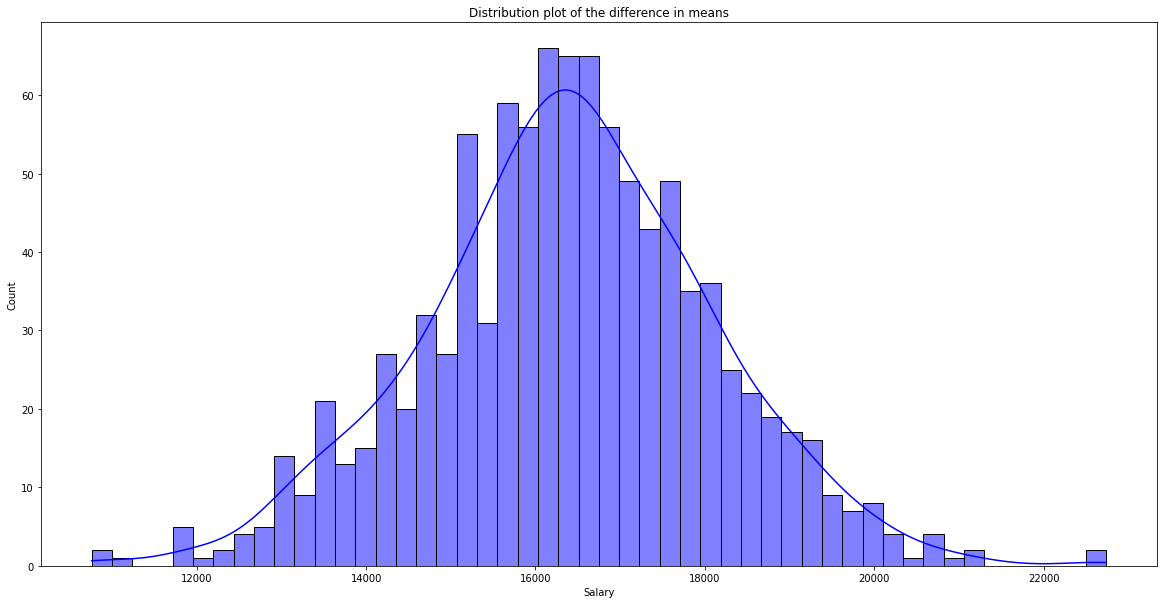

In [23]:
# Plotting difference in means of man and woman salary
male_mean = np.array(bootstrap_male)
female_mean = np.array(bootstrap_female)
difference_mean = male_mean - female_mean
print("Mean of the difference:", np.mean(difference_mean))
plt.figure(figsize = (20,10))
sns.histplot(difference_mean, kde=True, color="blue", bins=50)
plt.xlabel('Salary')
plt.title("Distribution plot of the difference in means")
plt.show()

**d). If suitable, perform a two-sample t-test with a 0.05 threshold on the bootstrapped data.**

In [24]:
# Performing Shapiro-Wilk test for normality check
threshold = 0.05
shapiro_boot_male = stats.shapiro(bootstrap_male) 
shapiro_boot_female = stats.shapiro(bootstrap_female)

print("Male")
print("Statistic:", shapiro_boot_male.statistic)
print("p-value:", shapiro_boot_male.pvalue)
hypothesis(shapiro_boot_male.pvalue,threshold)
print("Female")
print("Statistic:", shapiro_boot_female.statistic)
print("p-value:", shapiro_boot_female.pvalue)
hypothesis(shapiro_boot_female.pvalue,threshold)

Male
Statistic: 0.9968186616897583
p-value: 0.042312633246183395
We reject the null hypothesis as the data is not normally distributed

Female
Statistic: 0.9992488622665405
p-value: 0.9678499698638916
We fail to reject the null hypothesis as the data is normally distributed



In [25]:
# Performing Levene test to determine homogeneity of variance
levene_boot_stat, levene_boot_p = levene(bootstrap_male, bootstrap_female, center='mean')
print("Statistic:", levene_boot_stat)
print("p-value:", levene_boot_p)
if levene_boot_p>threshold:
  print("We fail to reject the homogeneity of variance")
else:
  print("We reject the homogeneity of variance")

Statistic: 182.17608297500595
p-value: 8.512306557896248e-40
We reject the homogeneity of variance


In [26]:
# T-test
t_test_stat, t_test_p = stats.ttest_ind(bootstrap_male, bootstrap_female, equal_var=False, alternative='two-sided')
print("T-Test results")
print("Statistic: ", t_test_stat)
print("p-value: ", t_test_p)

T-Test results
Statistic:  303.8655653401287
p-value:  0.0


**e). Comment on your findings**

The bootstrapped mean distribution plot shows that the average salary of women is around \$35,000 and for men, it is around \$51,000. The difference between them is around \$16,000. From the t-test result, it is found that the male and female salaries are not equal.

# **Q3. Select “highest level of formal education” (Q4) from the dataset and repeat steps a to e, this time use analysis of variance (ANOVA) instead of t-test for hypothesis testing to compare the means of salary for three groups (Bachelor’s degree, Master’s degree, and Doctoral degree)**

**a). Descriptive statistics for each group**

In [27]:
#Dataframe of Bachelor’s degree
bachelor = data.loc[data.Q4=='Bachelor’s degree']
df_bachelor = bachelor[['Q4', 'Q25']]
df_bachelor = df_bachelor.rename(columns = {'Q4':'Education Level', 'Q25':'Salary'})
print("Missing Values:", df_bachelor['Salary'].isnull().sum())
print("\nDescriptive statistics for Bachelor’s degree")
df_bachelor.describe()

Missing Values: 0

Descriptive statistics for Bachelor’s degree


,Salary
count,4777.000000
mean,35578.291815
std,89382.060777
min,1000.000000
25%,1000.000000
50%,7500.000000
75%,40000.000000
max,1000000.000000


In [28]:
#Dataframe of Master’s degree
master = data.loc[data.Q4=='Master’s degree']
df_master = master[['Q4', 'Q25']]
df_master = df_master.rename(columns = {'Q4':'Education Level', 'Q25':'Salary'})
print("Missing Values:", df_master['Salary'].isnull().sum())
print("\nDescriptive statistics for Master’s degree")
df_master.describe()

Missing Values: 0

Descriptive statistics for Master’s degree


,Salary
count,6799.000000
mean,52706.868657
std,90928.786678
min,1000.000000
25%,3000.000000
50%,25000.000000
75%,70000.000000
max,1000000.000000


In [29]:
#Dataframe of Doctoral degree
doctoral = data.loc[data.Q4=='Doctoral degree']
df_doctoral = doctoral[['Q4', 'Q25']]
df_doctoral = df_doctoral.rename(columns = {'Q4':'Education Level', 'Q25':'Salary'})
print("Missing Values:", df_doctoral['Salary'].isnull().sum())
print("\nDescriptive statistics for Doctoral degree")
df_doctoral.describe()

Missing Values: 0

Descriptive statistics for Doctoral degree


,Salary
count,2217.000000
mean,70641.181777
std,117160.947589
min,1000.000000
25%,4000.000000
50%,40000.000000
75%,90000.000000
max,1000000.000000


**b). If suitable, perform ANOVA test with a 0.05 threshold**

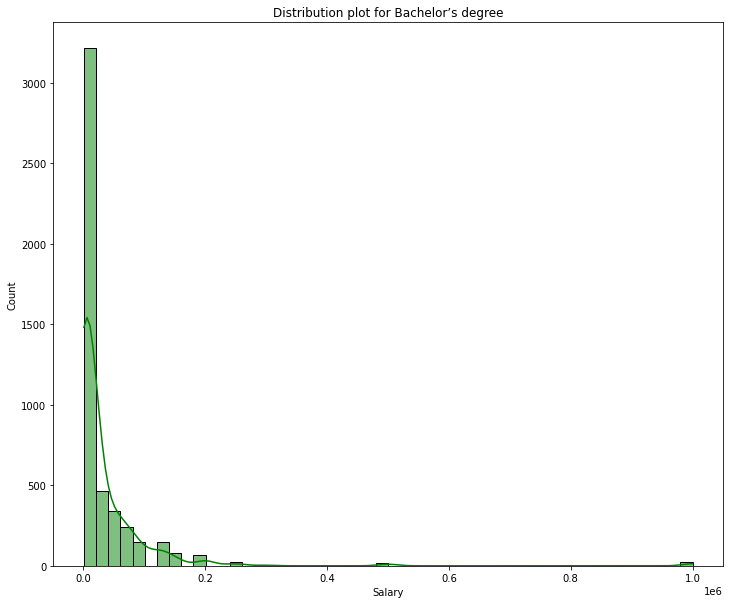

In [30]:
# Distribution plot of salary for Bachelor’s degree
plt.figure(figsize = (12,10))
sns.histplot(df_bachelor['Salary'], kde=True, color="green", bins=50)
plt.title("Distribution plot for Bachelor’s degree")
plt.show()

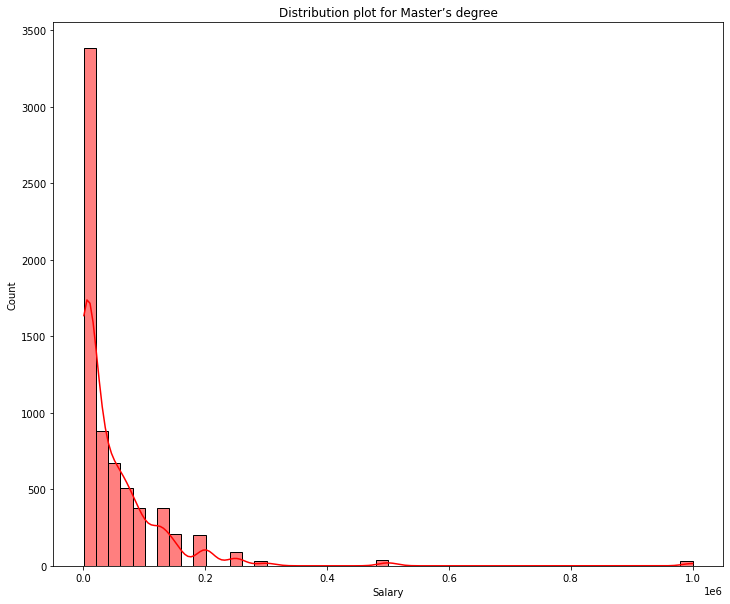

In [31]:
# Distribution plot of salary for Master’s degree
plt.figure(figsize = (12,10))
sns.histplot(df_master['Salary'], kde=True, color="red", bins=50)
plt.title("Distribution plot for Master’s degree")
plt.show()

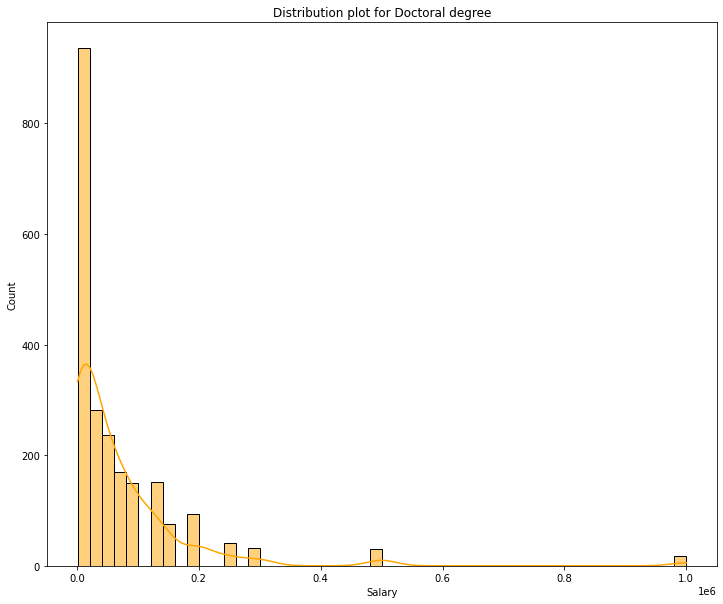

In [32]:
# Distribution plot of salary for Doctoral degree
plt.figure(figsize = (12,10))
sns.histplot(df_doctoral['Salary'], kde=True, color="orange", bins=50)
plt.title("Distribution plot for Doctoral degree")
plt.show()

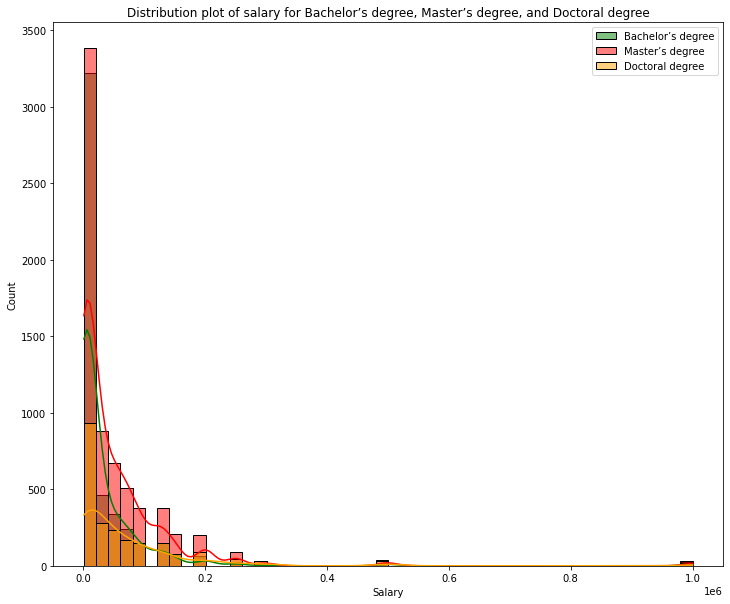

In [33]:
# Plotting Bachelor’s degree, Master’s degree, and Doctoral degree distribution in single plot
plt.figure(figsize = (12,10))
sns.histplot(df_bachelor['Salary'], kde=True, color="green", bins=50, label='Bachelor’s degree')
sns.histplot(df_master['Salary'], kde=True, color="red", bins=50, label='Master’s degree')
sns.histplot(df_doctoral['Salary'], kde=True, color="orange", bins=50, label='Doctoral degree')
plt.legend()
plt.title("Distribution plot of salary for Bachelor’s degree, Master’s degree, and Doctoral degree")
plt.show()

In [34]:
# Shapiro-Wilk test to determine normality
threshold = 0.05
shapiro_test_bachelor = stats.shapiro(df_bachelor['Salary'])
shapiro_test_master = stats.shapiro(df_master['Salary'])
shapiro_test_doctoral = stats.shapiro(df_doctoral['Salary'])

print("Bachelor’s degree")
print("Statistic:", shapiro_test_bachelor.statistic)
print("p-value:", shapiro_test_bachelor.pvalue)
hypothesis(shapiro_test_bachelor.pvalue,threshold)
print("Master’s degree")
print("Statistic:", shapiro_test_master.statistic)
print("p-value:", shapiro_test_master.pvalue)
hypothesis(shapiro_test_master.pvalue,threshold)
print("Doctoral degree")
print("Statistic:", shapiro_test_doctoral.statistic)
print("p-value:", shapiro_test_doctoral.pvalue)
hypothesis(shapiro_test_doctoral.pvalue,threshold)


Bachelor’s degree
Statistic: 0.3621261715888977
p-value: 0.0
We reject the null hypothesis as the data is not normally distributed

Master’s degree
Statistic: 0.5266796946525574
p-value: 0.0
We reject the null hypothesis as the data is not normally distributed

Doctoral degree
Statistic: 0.5536710023880005
p-value: 0.0
We reject the null hypothesis as the data is not normally distributed



In [35]:
# Levene test to determine homogeneity of variance
levene_stat, levene_p = levene(df_bachelor['Salary'], df_master['Salary'], df_doctoral['Salary'], center='mean')
print("Statistic:", levene_stat)
print("p-value:", levene_p)
if levene_p>threshold:
  print("We fail to reject the homogeneity of variance")
else:
  print("We reject the homogeneity of variance")

Statistic: 79.55052997803631
p-value: 4.46091041844939e-35
We reject the homogeneity of variance


Based on the histogram and Shapiro-Wilk test we can see that the data is not normally distributed. And, based on levene test we can see that the variance is not equal for Bachelor’s degree, Master’s degree, and Doctoral degree.

**c). Bootstrap the data, Plot two bootstrapped distributions (for Bachelor’s degree, Master’s degree, and Doctoral degree) and the distribution of the difference in means.**

Mean of the bootstrapped data for Bachelor’s: 35588.65815365292


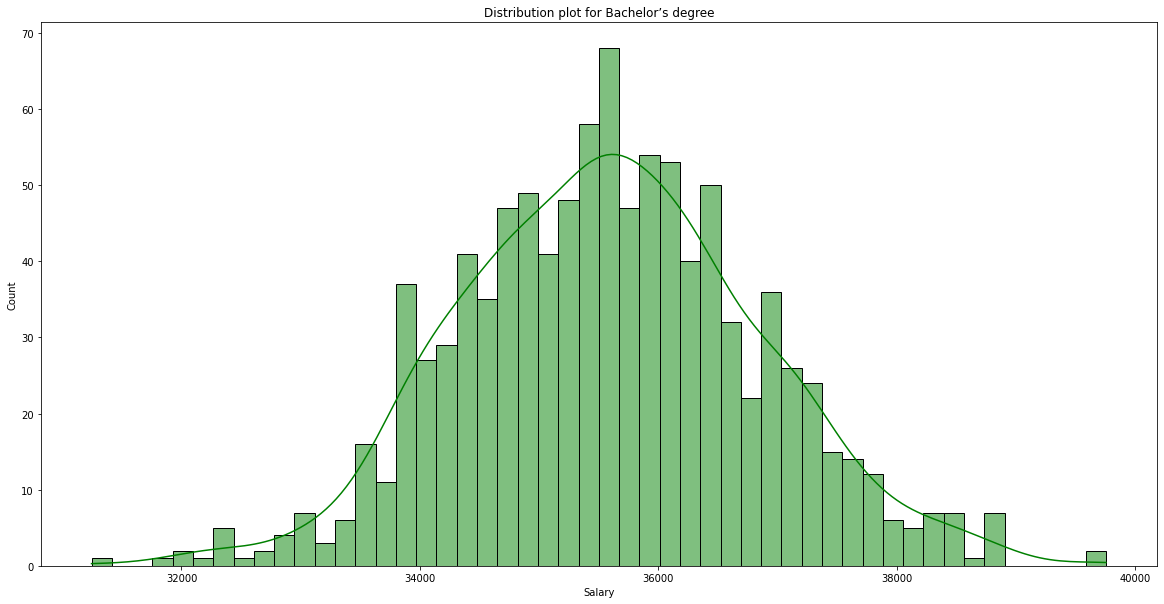

In [36]:
# Bootstrapped distribution for Bachelor’s degree
bootstrap_bachelor = bootstrap(df_bachelor['Salary'])
print("Mean of the bootstrapped data for Bachelor’s:", np.mean(bootstrap_bachelor))
plt.figure(figsize = (20,10))
sns.histplot(bootstrap_bachelor, kde=True, color="green", bins=50)
plt.xlabel('Salary')
plt.title("Distribution plot for Bachelor’s degree")
plt.show()

Mean of the bootstrapped data for Master’s: 52683.58839535226


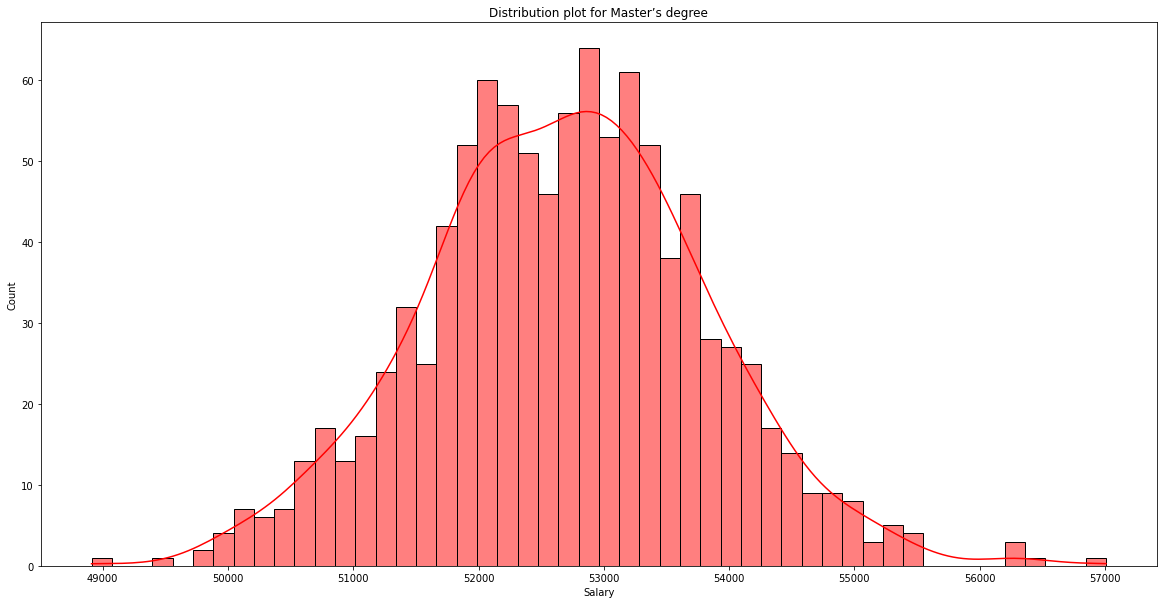

In [37]:
# Bootstrapped distribution for Master’s degree
bootstrap_master = bootstrap(df_master['Salary'])
print("Mean of the bootstrapped data for Master’s:", np.mean(bootstrap_master))
plt.figure(figsize = (20,10))
sns.histplot(bootstrap_master, kde=True, color="red", bins=50)
plt.xlabel('Salary')
plt.title("Distribution plot for Master’s degree")
plt.show()

Mean of the bootstrapped data for Doctoral: 70601.57262065855


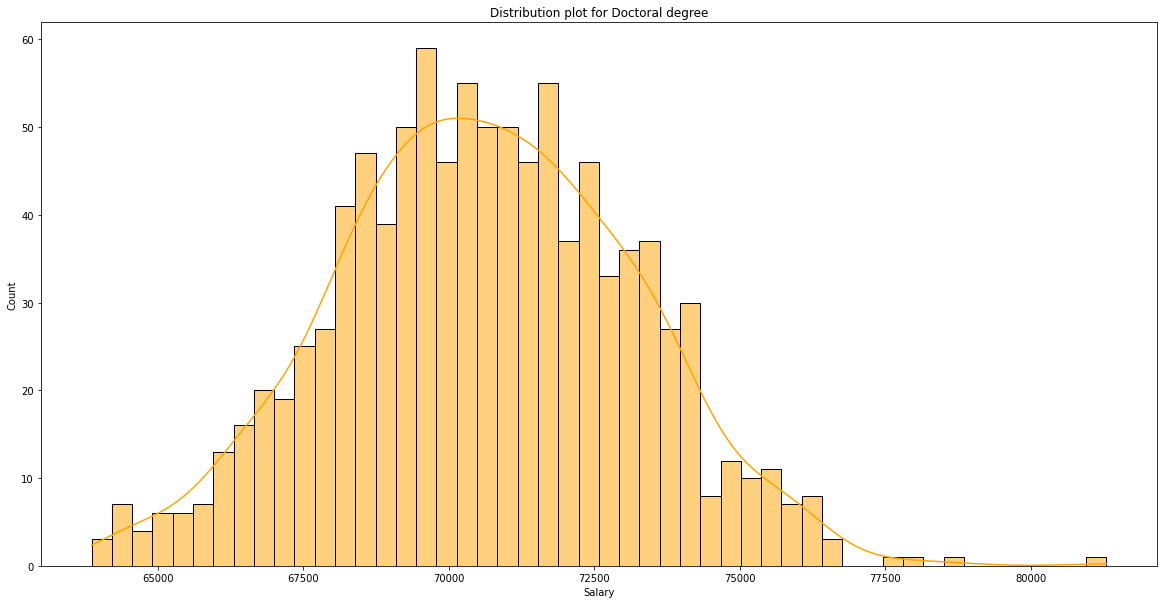

In [38]:
# Bootstrapped distribution for Doctoral degree
bootstrap_doctoral = bootstrap(df_doctoral['Salary'])
print("Mean of the bootstrapped data for Doctoral:", np.mean(bootstrap_doctoral))
plt.figure(figsize = (20,10))
sns.histplot(bootstrap_doctoral, kde=True, color="orange", bins=50)
plt.xlabel('Salary')
plt.title("Distribution plot for Doctoral degree")
plt.show()

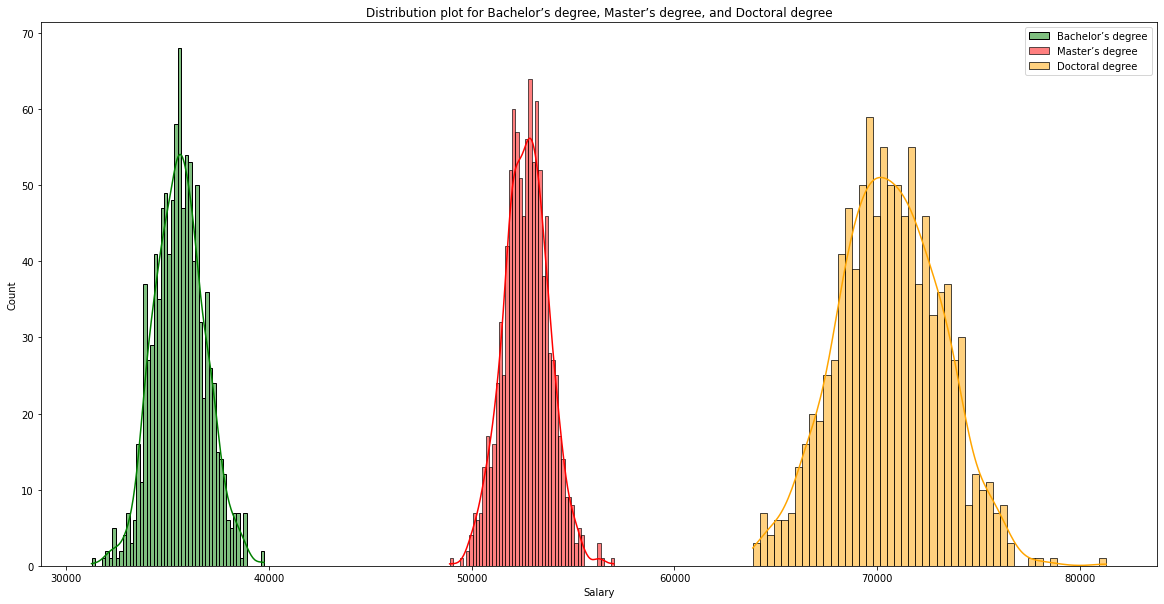

In [39]:
# Bootstrapped distribution for Bachelor’s degree, Master’s degree, and Doctoral degree in single plot
plt.figure(figsize = (20,10))
sns.histplot(bootstrap_bachelor, kde=True, color="green", bins=50, label='Bachelor’s degree')
sns.histplot(bootstrap_master, kde=True, color="red", bins=50, label='Master’s degree')
sns.histplot(bootstrap_doctoral, kde=True, color="orange", bins=50, label='Doctoral degree')
plt.legend()
plt.xlabel('Salary')
plt.title("Distribution plot for Bachelor’s degree, Master’s degree, and Doctoral degree")
plt.show()

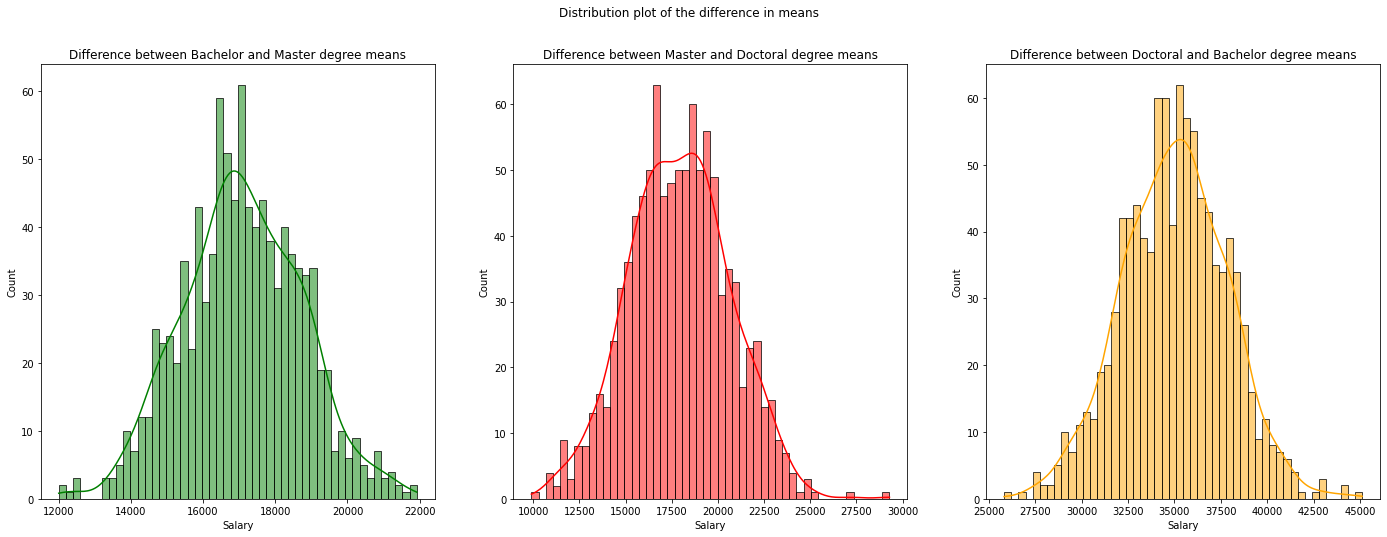

In [40]:
# Plotting difference in means
bachelor_mean = np.array(bootstrap_bachelor)
master_mean = np.array(bootstrap_master)
doctoral_mean = np.array(bootstrap_doctoral)
difference_mean_1 = master_mean - bachelor_mean
difference_mean_2 = doctoral_mean - master_mean
difference_mean_3 = doctoral_mean - bachelor_mean

fig, axis = plt.subplots(nrows=1,ncols=3,figsize=(24,8))
sns.histplot(ax=axis[0], data=difference_mean_1, kde=True, color="green", bins=50)
sns.histplot(ax=axis[1], data=difference_mean_2, kde=True, color="red", bins=50)
sns.histplot(ax=axis[2], data=difference_mean_3, kde=True, color="orange", bins=50)
axis[0].set_xlabel('Salary')
axis[1].set_xlabel('Salary')
axis[2].set_xlabel('Salary')
axis[0].set_title("Difference between Bachelor and Master degree means")
axis[1].set_title("Difference between Master and Doctoral degree means")
axis[2].set_title("Difference between Doctoral and Bachelor degree means")
fig.suptitle('Distribution plot of the difference in means')
plt.show()

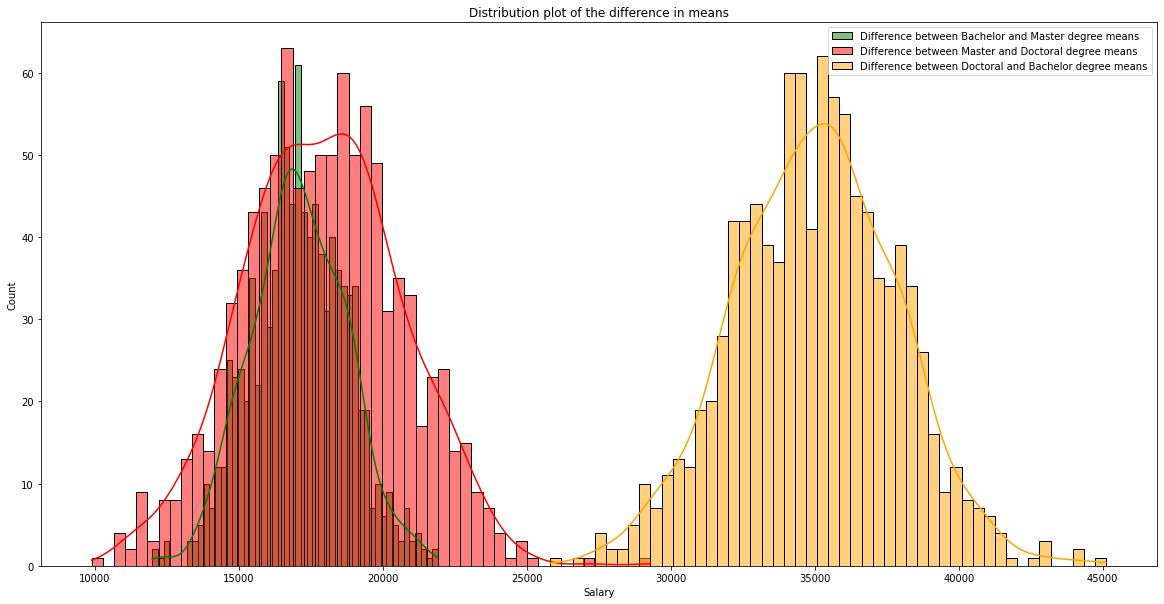

In [41]:
# Plotting difference in means in single plot
plt.figure(figsize = (20,10))
sns.histplot(difference_mean_1, kde=True, color="green", bins=50, label='Difference between Bachelor and Master degree means')
sns.histplot(difference_mean_2, kde=True, color="red", bins=50, label='Difference between Master and Doctoral degree means')
sns.histplot(difference_mean_3, kde=True, color="orange", bins=50, label='Difference between Doctoral and Bachelor degree means')
plt.xlabel('Salary')
plt.title("Distribution plot of the difference in means")
plt.legend()
plt.show()

**d). If suitable, perform ANOVA test with a 0.05 threshold on the bootstrapped data.**

In [42]:
# Performing Shapiro-Wilk test for normality check
threshold = 0.05
shapiro_boot_bachelor = stats.shapiro(bootstrap_bachelor)
shapiro_boot_master = stats.shapiro(bootstrap_master)
shapiro_boot_doctoral = stats.shapiro(bootstrap_doctoral)

print("Bachelor’s degree")
print("Statistic:", shapiro_boot_bachelor.statistic)
print("p-value:", shapiro_boot_bachelor.pvalue)
hypothesis(shapiro_boot_bachelor.pvalue,threshold)
print("Master’s degree")
print("Statistic:", shapiro_boot_master.statistic)
print("p-value:", shapiro_boot_master.pvalue)
hypothesis(shapiro_boot_master.pvalue,threshold)
print("Doctral degree")
print("Statistic:", shapiro_boot_doctoral.statistic)
print("p-value:", shapiro_boot_doctoral.pvalue)
hypothesis(shapiro_boot_doctoral.pvalue,threshold)

Bachelor’s degree
Statistic: 0.9983461499214172
p-value: 0.4584142565727234
We fail to reject the null hypothesis as the data is normally distributed

Master’s degree
Statistic: 0.9982201457023621
p-value: 0.38733676075935364
We fail to reject the null hypothesis as the data is normally distributed

Doctral degree
Statistic: 0.9978442192077637
p-value: 0.2233937829732895
We fail to reject the null hypothesis as the data is normally distributed



In [43]:
# Levene test to determine homogeneity of variance
levene_boot_stat, levene_boot_p = levene(bootstrap_bachelor, bootstrap_master, bootstrap_doctoral, center='mean')
print("Statistic:", levene_boot_stat)
print("p-value:", levene_boot_p)
if levene_boot_p>threshold:
  print("We fail to reject the homogeneity of variance")
else:
  print("We reject the homogeneity of variance")

Statistic: 373.2475288718431
p-value: 1.8159506970848197e-145
We reject the homogeneity of variance


In [44]:
# ANOVA Test
anova_stat, anova_p = stats.f_oneway(bootstrap_bachelor, bootstrap_master, bootstrap_doctoral)
print("ANOVA Test results")
print("Statistic: ", anova_stat)
print("p-value: ", anova_p)

ANOVA Test results
Statistic:  98175.02782180421
p-value:  0.0


**e). Comment on your findings**

According to the bootstrapped mean distribution plot, the average salaries for bachelor’s, master’s, and doctoral degrees are around \$35,000, \$52,000, and \$70,000 respectively. From the distribution plots and the test results, the people with higher education levels have higher salaries.